In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\Bank_Personal_Loan.csv")

In [3]:
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
df.shape

(5000, 14)

In [5]:
df.size

70000

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Personal Loan'].unique()

array([0, 1], dtype=int64)

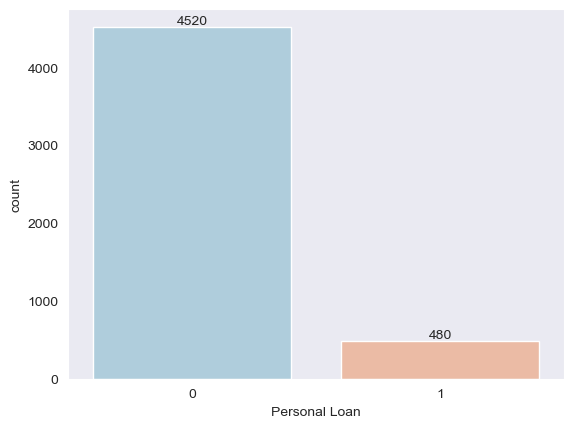

In [13]:
sns.set_style('dark') 
ax = sns.countplot(x = 'Personal Loan', data=df, palette = 'RdBu_r')
for bars in ax.containers: 
    ax.bar_label(bars)

In [14]:
df.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

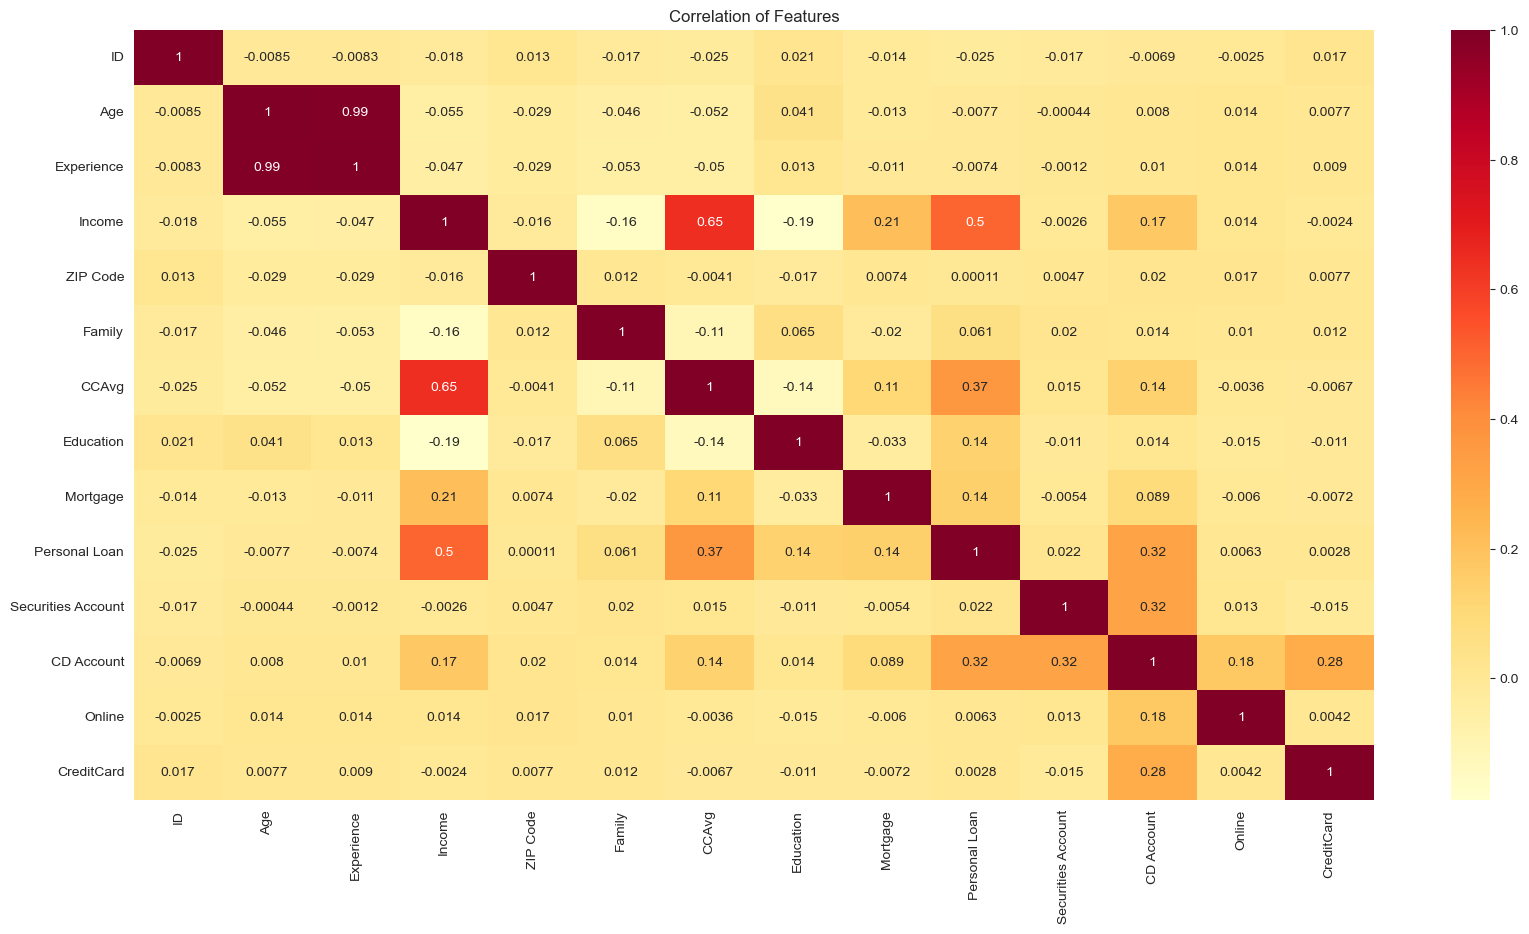

In [15]:
plt.figure(figsize = (20,10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation of Features")
plt.show()

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


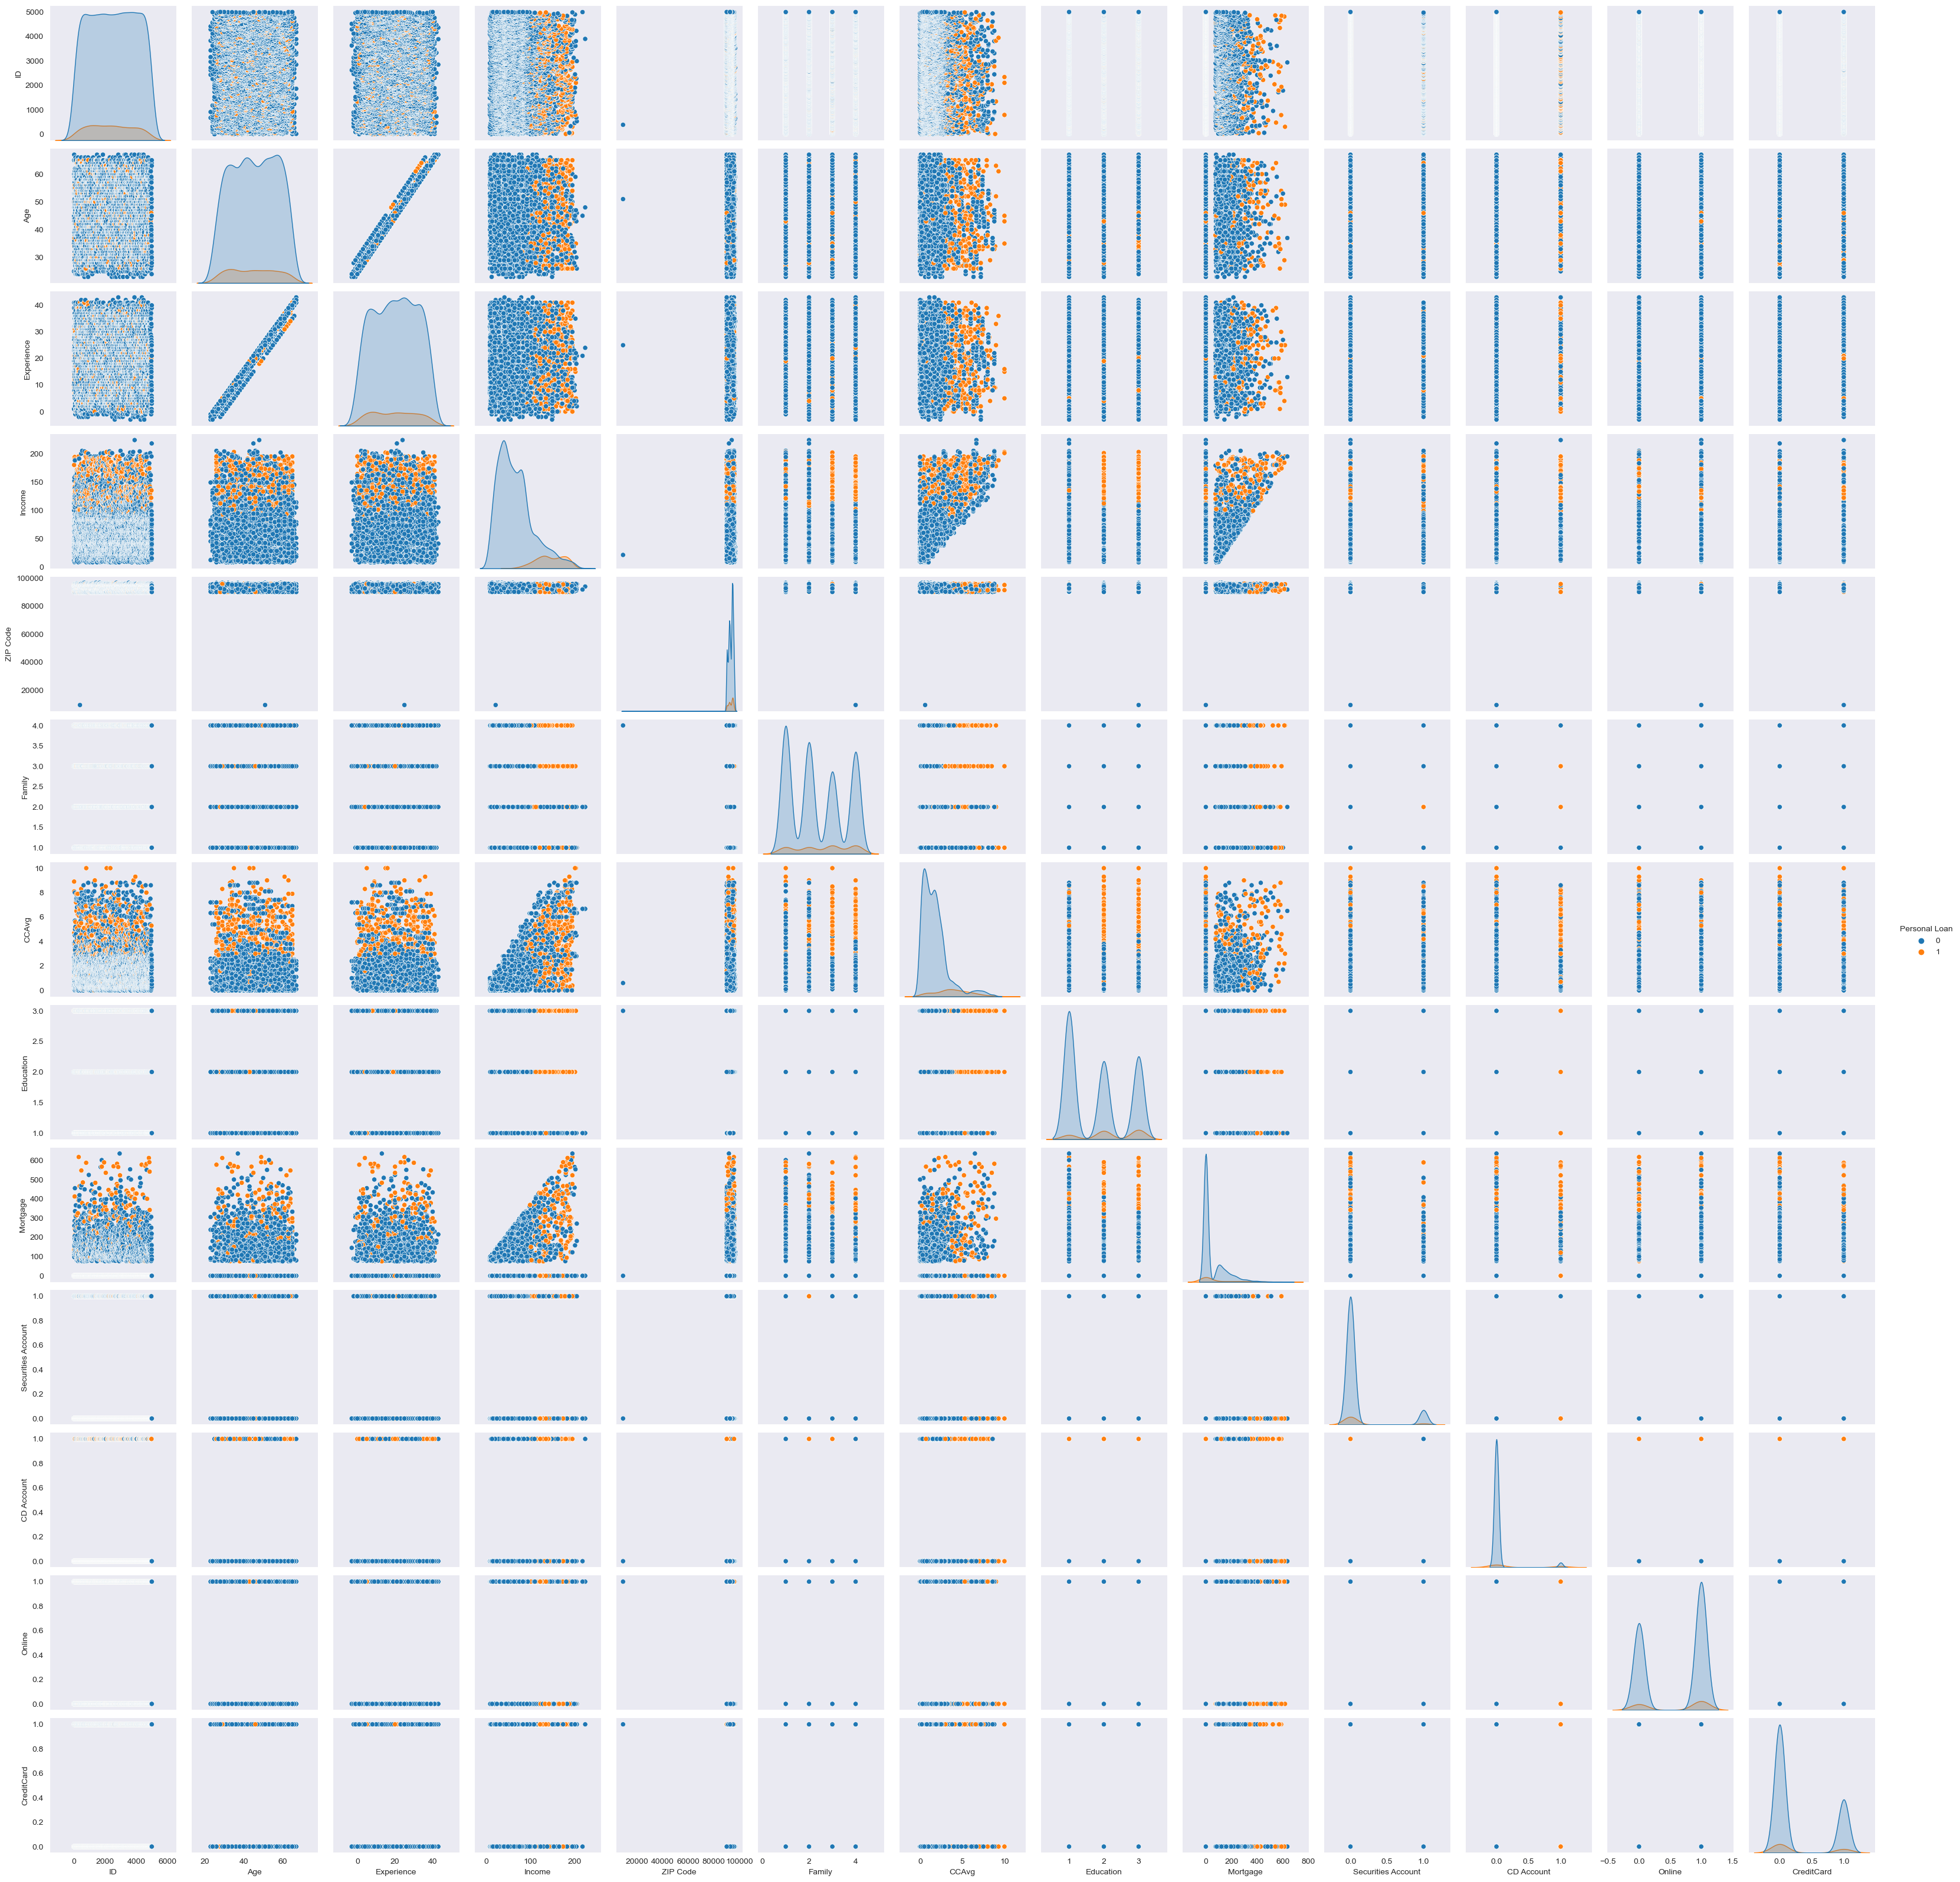

In [16]:
sns.pairplot(df, hue = 'Personal Loan')

<Axes: xlabel='Age', ylabel='Experience'>

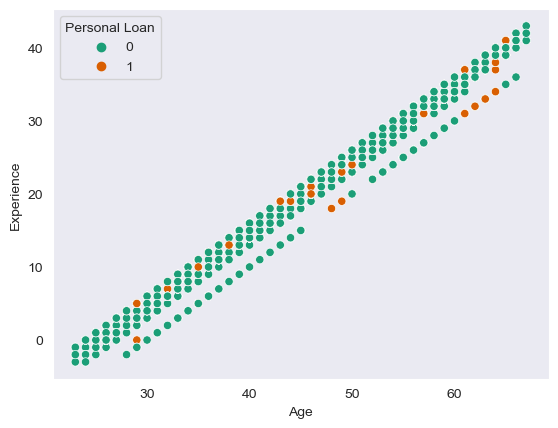

In [17]:
sns.scatterplot(x = 'Age', y = 'Experience', data = df, hue = 'Personal Loan', palette = 'Dark2')

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


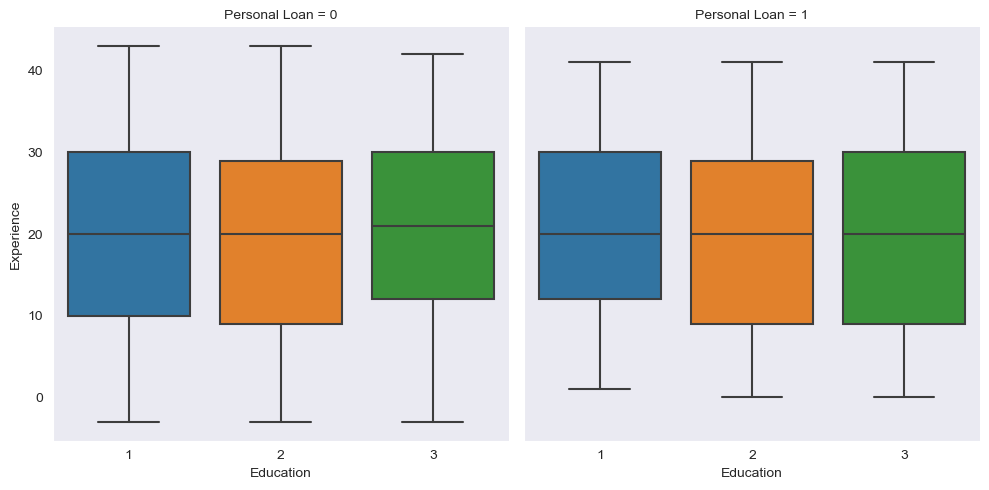

In [18]:
sns.catplot(x = 'Education', y = 'Experience', col = 'Personal Loan', data = df, kind = 'box')

In [19]:
# Create counts of df for plotting categorial variables
loan = np.unique(df['Personal Loan'], return_counts=True)
print('loan ={}\n'.format(loan))

loan =(array([0, 1], dtype=int64), array([4520,  480], dtype=int64))



In [20]:
# Create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color': 'darkred', 'weight': 'bold', 'size': 16}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 14}

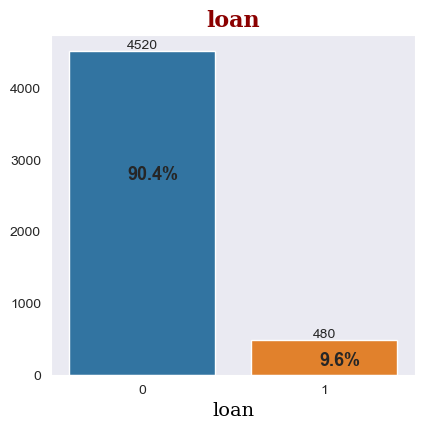

In [21]:
# Display a frequency distribution for Personal Loan
fig = plt.figure(figsize=[16,15]);
ax1= fig.add_subplot(3,3,2);
sns.barplot(x=list(loan[0]), y = list(loan[1]), ax=ax1);
ax1.text(0.2, 2800, '{}%'.format(str(round(loan[1][0]/sum(loan[1])*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight': 'bold'})
ax1.text(1.2, 200, '{}%'.format(str(round(loan[1][1]/sum(loan[1])*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight' : 'bold'})
ax1.set_title('loan', fontdict = axtitle_dict);
ax1.set_xlabel('loan', fontdict = axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

In [22]:
# Create counts of df for plotting categorical variables
Online_account = np.unique(df['Online'], return_counts=True)
print('Online_account ={}\n'.format(Online_account))

Online_account =(array([0, 1], dtype=int64), array([2016, 2984], dtype=int64))



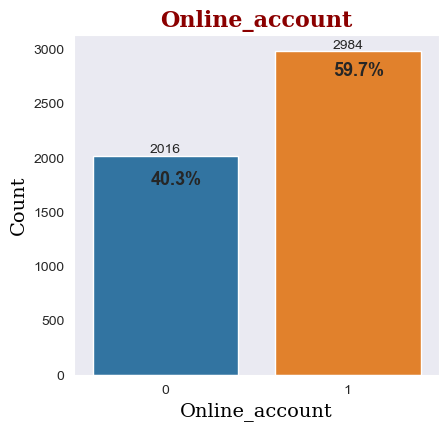

In [23]:
fig = plt.figure(figsize=[16,15]);
ax1= fig.add_subplot(3,3,2);
sns.barplot(x=list(Online_account[0]), y = list(Online_account[1]), ax=ax1);
ax1.text(0.2, 1800, '{}%'.format(str(round(Online_account[1][0]/sum(Online_account[1])*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight': 'bold'})
ax1.text(1.2, 2800, '{}%'.format(str(round(Online_account[1][1]/sum(Online_account[1])*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight' : 'bold'})
ax1.set_title('Online_account', fontdict = axtitle_dict);
ax1.set_xlabel('Online_account', fontdict = axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

In [24]:
# Filtering Numericals and Categoricals Columns:
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=5:
           if col!="Personal Loan":
            categ_columns.append(col)
print('categorical numericals columns are {}', format(categ_columns))

categorical numericals columns are {} ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


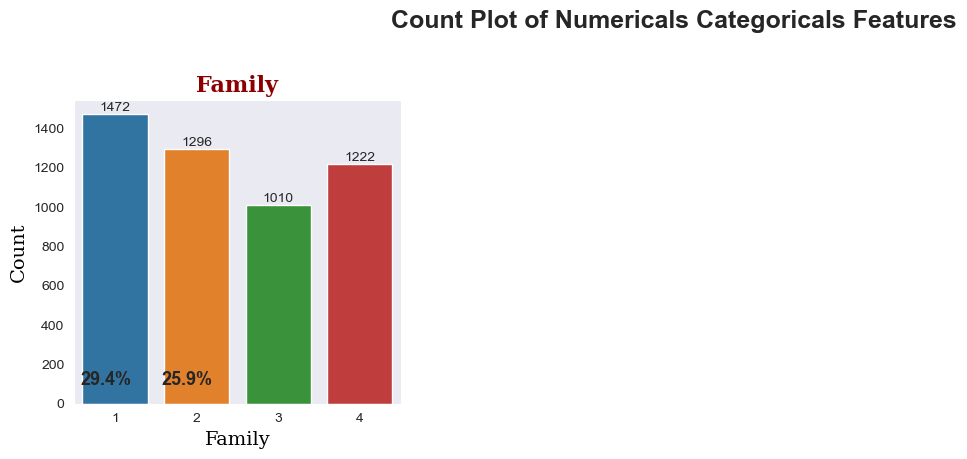

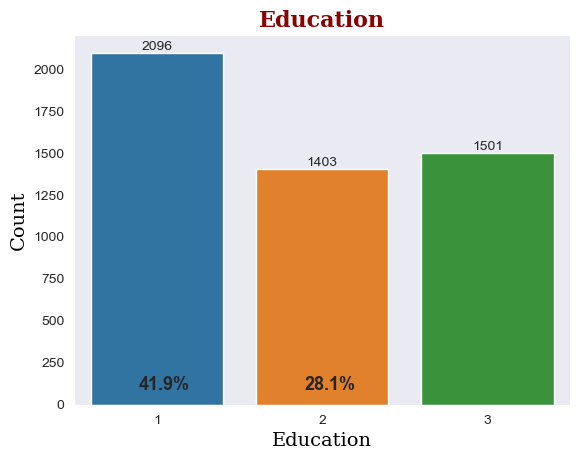

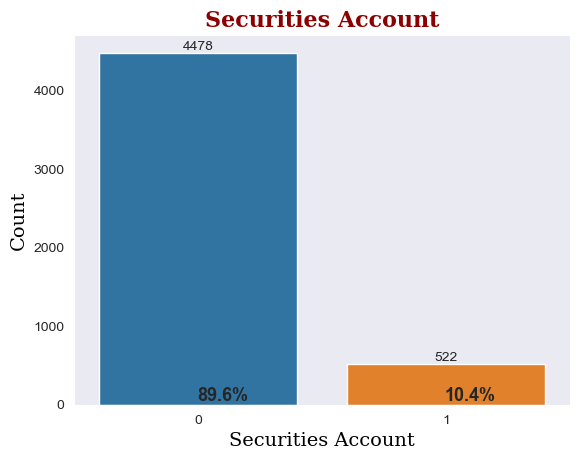

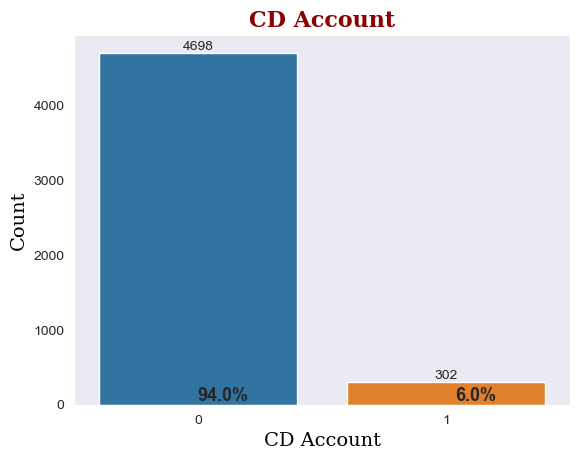

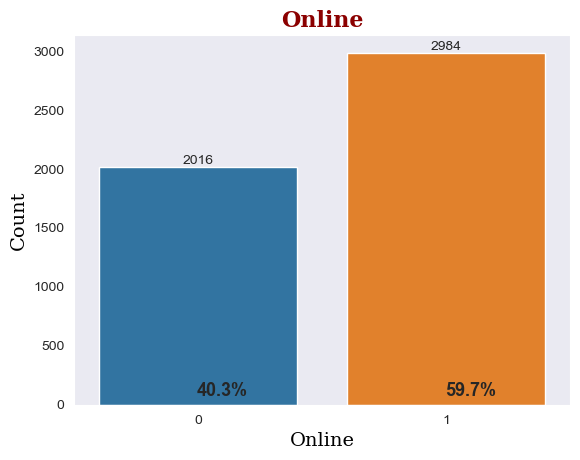

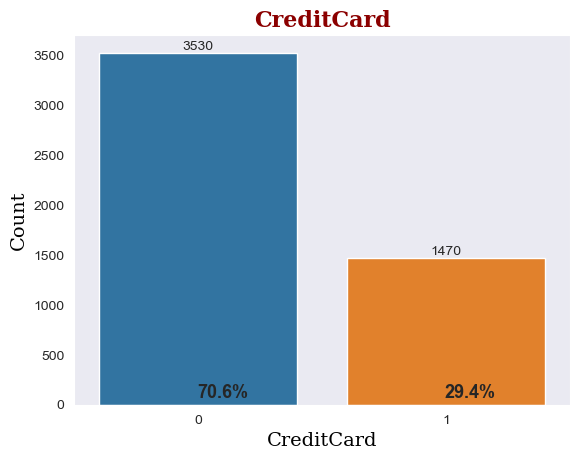

In [25]:
# Unvariate Analysis
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Numericals Categoricals Features', fontsize=18, fontweight = 'bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, columns in enumerate(categ_columns):
    input = np.unique(df[columns], return_counts = True)
    col = 'input'
    ax1 = fig.add_subplot(3,3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for perentage values
    ax1.text(0.2, 120, '{}%'.format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%'.format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))),ha = 'right', va ='center', size = 13, fontdict={'weight' : 'bold'})
    ax1.set_title(f'{columns}', fontdict = axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict = axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])
    plt.show()

In [26]:
x = df.drop('Personal Loan', axis = 1)
print(x)
y = df['Personal Loan']
print(y)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
0            0                

# NAIVE BAYES 

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [28]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [29]:
naive_bayes.score(x_test,y_test)

0.882

In [30]:
naive_bayes.score(x_train,y_train)

0.8888571428571429

# DECISION TREE

# Entropy

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.9053752355876059, 0.9891304347826086, 'x[11] <= 0.5\nentropy = 0.874\nsamples = 5000\nvalue = [3530, 1470]'),
 Text(0.8497513711042902, 0.967391304347826, 'x[10] <= 0.5\nentropy = 0.829\nsamples = 4698\nvalue = [3468.0, 1230.0]'),
 Text(0.877563303345948, 0.9782608695652173, 'True  '),
 Text(0.7739048257529899, 0.9456521739130435, 'x[9] <= 0.5\nentropy = 0.847\nsamples = 4323\nvalue = [3138, 1185]'),
 Text(0.6839790527253539, 0.9239130434782609, 'x[0] <= 4914.5\nentropy = 0.861\nsamples = 3992\nvalue = [2857, 1135]'),
 Text(0.543795903663961, 0.9021739130434783, 'x[8] <= 402.5\nentropy = 0.857\nsamples = 3916\nvalue = [2815, 1101]'),
 Text(0.3895211909249267, 0.8804347826086957, 'x[6] <= 1.725\nentropy = 0.859\nsamples = 3883\nvalue = [2785, 1098]'),
 Text(0.16828401385503394, 0.8586956521739131, 'x[0] <= 122.5\nentropy = 0.877\nsamples = 2350\nvalue = [1653.0, 697.0]'),
 Text(0.07768891060903148, 0.8369565217391305, 'x[1] <= 49.5\nentropy = 0.51\nsamples = 53\nvalue = [47, 6]'

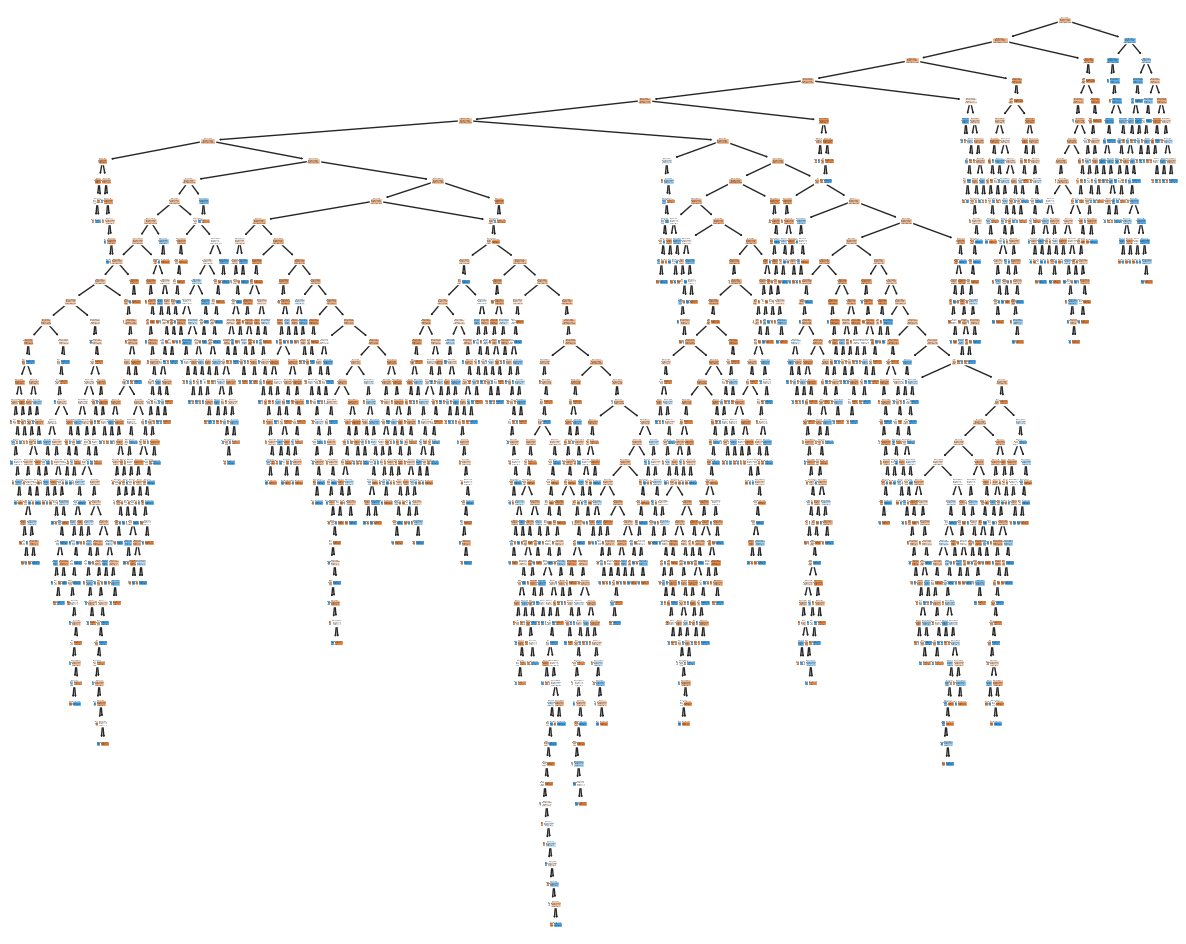

In [32]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

# Gini Index

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.9098349678227119, 0.984375, 'x[11] <= 0.5\ngini = 0.415\nsamples = 5000\nvalue = [3530, 1470]'),
 Text(0.8581491788368713, 0.953125, 'x[10] <= 0.5\ngini = 0.387\nsamples = 4698\nvalue = [3468.0, 1230.0]'),
 Text(0.8839920733297916, 0.96875, 'True  '),
 Text(0.7885220934295647, 0.921875, 'x[9] <= 0.5\ngini = 0.398\nsamples = 4323\nvalue = [3138, 1185]'),
 Text(0.6992458459007181, 0.890625, 'x[0] <= 4914.5\ngini = 0.407\nsamples = 3992\nvalue = [2857, 1135]'),
 Text(0.5860028475878841, 0.859375, 'x[8] <= 322.5\ngini = 0.404\nsamples = 3916\nvalue = [2815, 1101]'),
 Text(0.3766521389459074, 0.828125, 'x[6] <= 1.725\ngini = 0.407\nsamples = 3833\nvalue = [2745, 1088]'),
 Text(0.17546819074281098, 0.796875, 'x[0] <= 122.5\ngini = 0.417\nsamples = 2338\nvalue = [1645.0, 693.0]'),
 Text(0.11464860446983005, 0.765625, 'x[6] <= 1.25\ngini = 0.201\nsamples = 53\nvalue = [47, 6]'),
 Text(0.11164241359549823, 0.734375, 'x[0] <= 8.5\ngini = 0.124\nsamples = 45\nvalue = [42, 3]'),
 Text(0.10

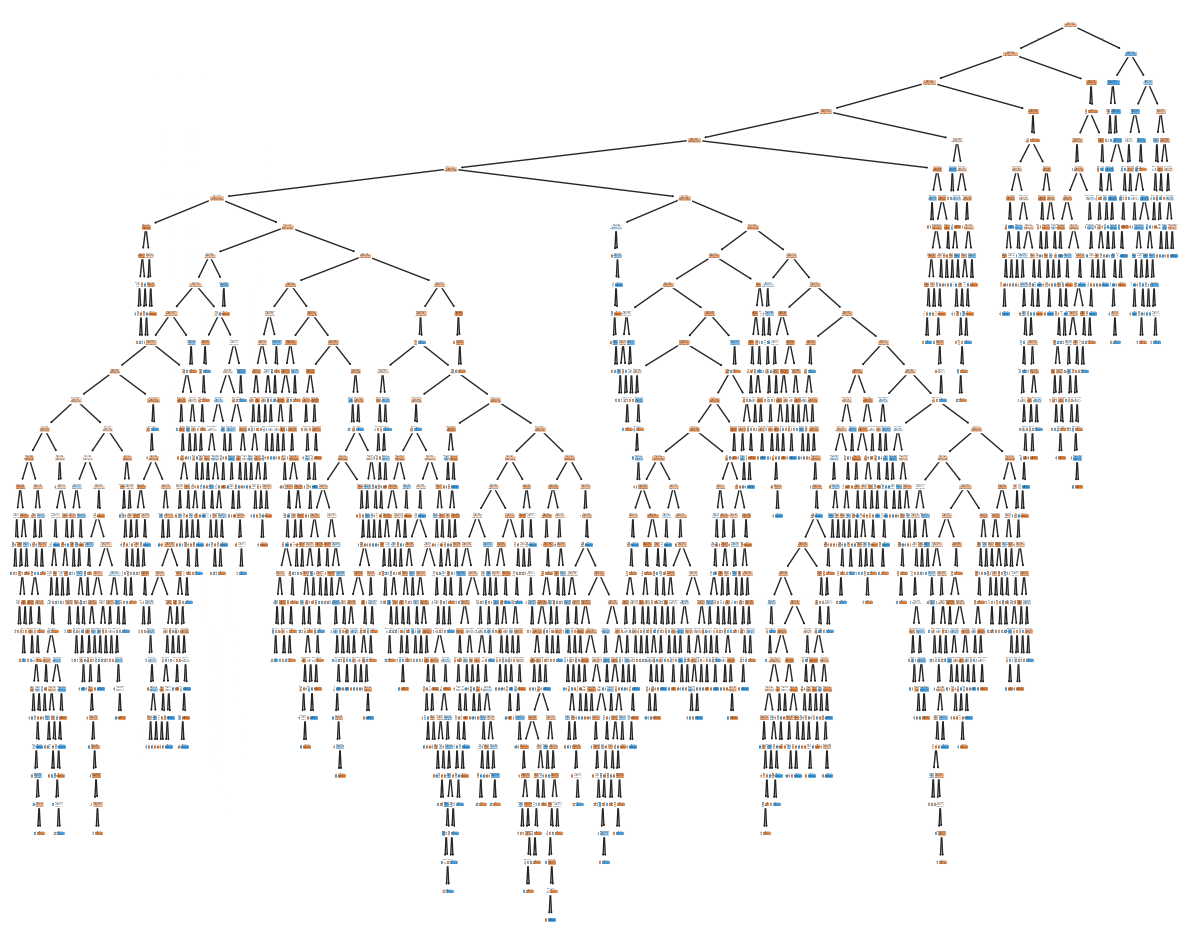

In [34]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [36]:
# Prepruning
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
          'min_samples_split' : [2,3,4],
          'min_samples_leaf': [1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [37]:
gcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [38]:
y_pred = gcv.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
accuracy_score(y_test,y_pred)

0.9793333333333333

In [41]:
confusion_matrix(y_test,y_pred)

array([[1348,    6],
       [  25,  121]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.95      0.83      0.89       146

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# (KNN) K-NEAREST NEIGHBOUR

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = knn.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89


# RANDOM FOREST

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model = AdaBoostClassifier(n_estimators = 1)

In [48]:
model.fit(x_train, y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [49]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [50]:
preds = model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1354
           1       0.00      0.00      0.00       146

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.86      1500



D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


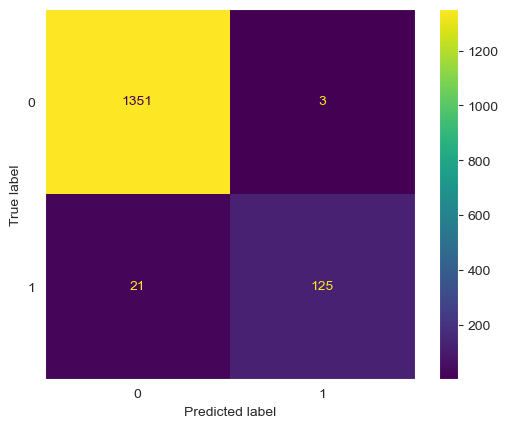

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Assuming you have already split your data into x_train, x_test, y_train, y_test
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [53]:
# Assuming you have already split your data into x_train, x_test, y_train, y_test
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [54]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.984


# SUPPORT VECTOR MACHINE

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [59]:
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)

In [60]:
from sklearn.svm import SVC, LinearSVR

In [61]:
base_model = SVC()

In [62]:
base_model.fit(scaled_x_train, y_train)

SVC()

In [63]:
base_preds = base_model.predict(scaled_x_test)
base_preds

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
x_train

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
2654  2655   60          36      49     94965       4    2.2          1   
2468  2469   49          23     133     94304       1    7.3          1   
290    291   51          25      80     92373       1    4.9          1   
1463  1464   35          10      94     91343       1    0.0          1   
4508  4509   27           2      85     94117       1    1.9          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4171  4172   58          31      49     94521       4    2.5          2   
599    600   28           4     103     94720       2    2.5          1   
1361  1362   50          26      38     95039       4    0.9          2   
1547  1548   47          21      52     94720       1    1.2          2   
4959  4960   51          27      55     93014       1    1.6          2   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
2654       204                   1           0       1           0  
2468         0                   0           0       1           1  
290          0                   0           0       0           0  
1463       174                   0           0       1           0  
4508         0                   0           0       1           1  
...        ...                 ...         ...     ...         ...  
4171         0                   0           0       1           0  
599          0                   0           0       1           1  
1361         0                   0           0       1           0  
1547       194                   0           0       0           0  
4959       197                   1           0       1           0  

[3500 rows x 13 columns]

In [65]:
scaled_x_test

array([[-0.54066851, -0.48005494, -0.37214816, ..., -0.25413542,
         0.81309874,  1.62233204],
       [ 0.01255794,  0.48215431,  0.59000236, ...,  3.93490997,
         0.81309874,  1.62233204],
       [-1.49852463,  0.48215431,  0.59000236, ..., -0.25413542,
         0.81309874, -0.61639663],
       ...,
       [ 1.49433974, -1.35479063, -1.33429869, ...,  3.93490997,
         0.81309874,  1.62233204],
       [-0.55322598, -0.21763424, -0.37214816, ..., -0.25413542,
        -1.22986292, -0.61639663],
       [-1.18807599,  0.83204859,  0.85240705, ..., -0.25413542,
         0.81309874,  1.62233204]])

In [66]:
regression= SVC()

In [67]:
regression.fit(x_train, y_train)

SVC()

In [68]:
regression.score(x_train, y_train)

0.9045714285714286

In [69]:
regression.score(x_test, y_test)

0.9026666666666666

In [70]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

SVC()

In [71]:
y_pred = clf.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9026666666666666
